In [62]:
import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
# from tensorflow.keras.datasets import mnist
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import accuracy_score, precision_score, recall_score

In [63]:
mnist = tf.keras.datasets.mnist
print("MNIST data loaded")


MNIST data loaded


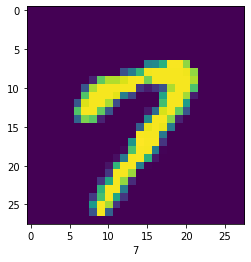

In [64]:
#  how these images look like in matplotlib?
plt.imshow(mnist.load_data()[0][0][15]) #, cmap='binary') # these are grayscale images
# therefore set colour map to binary.
plt.xlabel(mnist.load_data()[0][1][15])
plt.show()

In [65]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_trn = X_train[..., np.newaxis].astype(np.float32) / 255.
# X_tst = X_test[..., np.newaxis].astype(np.float32) / 255.

In [66]:
X_train[0].shape

(28, 28)

In [67]:

def nn_model(var_activation,var_optimizer):
  """ Uses arguments to build Keras model. """
  model = Sequential()
  model.add(Flatten(input_shape=X_train[0].shape))#[28, 28, 1]))
  model.add(Dense(64,activation=var_activation))
  model.add(Dense(32,activation=var_activation))
  model.add(Dense(16,activation=var_activation))
  model.add(Dense(10,activation='softmax'))
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer=var_optimizer,
                metrics=["accuracy"])
  return model

In [69]:
# example
model = nn_model(var_activation='relu',var_optimizer='sgd')
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_42 (Flatten)        (None, 784)               0         
                                                                 
 dense_168 (Dense)           (None, 64)                50240     
                                                                 
 dense_169 (Dense)           (None, 32)                2080      
                                                                 
 dense_170 (Dense)           (None, 16)                528       
                                                                 
 dense_171 (Dense)           (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [70]:
acti=['tanh','relu']
opti=['sgd']
b_size=[2]
space=dict(var_activation=acti,
            var_optimizer=opti,
            batch_size=b_size)
print(space)

{'var_activation': ['tanh', 'relu'], 'var_optimizer': ['sgd'], 'batch_size': [2]}


In [74]:
classifier_model = KerasClassifier(build_fn=nn_model)#,epochs=4,batch_size=8)

In [75]:
ranser = RandomizedSearchCV(classifier_model, param_distributions=space, cv=3,  n_iter=3)
# rscv_results = ranser.fit(X_train, y_train)

In [76]:
rscv_results = ranser.fit(X_train, y_train )

30000/30000 [==============================] - 49s 2ms/step - loss: 1.9231 - accuracy: 0.2758


In [78]:
ranser.best_score_

0.2814499984184901

In [79]:
ranser.best_params_

{'var_optimizer': 'sgd', 'var_activation': 'tanh', 'batch_size': 2}